# 導入函式庫

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout
from keras.layers import LSTM, Conv2D
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

from keras.datasets import imdb

(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=10000)
print(f'訓練資料總比數:{len(x_train)}')
print(f'測試資料總比數:{len(x_test)}')

env: KERAS_BACKEND=tensorflow


Using TensorFlow backend.


訓練資料總比數:25000
測試資料總比數:25000


# 資料前處理

In [2]:
x_train = sequence.pad_sequences(x_train, maxlen=250)
x_test = sequence.pad_sequences(x_test, maxlen=250)

# Model

In [3]:
N = 5
K = 20

In [4]:
early_stopping = EarlyStopping(monitor='val_loss', patience=1, verbose=1)

In [5]:
model = Sequential()
model.add(Embedding(10000, N))
model.add(LSTM(K))
model.add(Dropout(0.5))
model.add(Dense(20, activation='selu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 5)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 52,521
Trainable params: 52,521
Non-trainable params: 0
_________________________________________________________________


In [6]:
Model = model.fit(x_train, y_train, batch_size=400, epochs=10, validation_data = (x_test,y_test), callbacks=[early_stopping])

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 33s 1ms/step - loss: 0.6855 - acc: 0.5634 - val_loss: 0.6118 - val_acc: 0.7121
Epoch 2/10
25000/25000 [==============================] - 31s 1ms/step - loss: 0.4054 - acc: 0.8262 - val_loss: 0.3121 - val_acc: 0.8673
Epoch 3/10
25000/25000 [==============================] - 31s 1ms/step - loss: 0.2489 - acc: 0.9079 - val_loss: 0.2910 - val_acc: 0.8778
Epoch 4/10
25000/25000 [==============================] - 31s 1ms/step - loss: 0.1928 - acc: 0.9327 - val_loss: 0.2935 - val_acc: 0.8802
Epoch 00004: early stopping


In [7]:
score_train = model.evaluate(x_train, y_train, batch_size=400)
score_test = model.evaluate(x_test, y_test, batch_size=400)
print('train_loss:',score_train[0],'train_accuracy:',score_train[1] )
print('test_loss:',score_test[0],'test_accuracy:',score_test[1] )

25000/25000 [==============================] - 7s 281us/step
train_loss: 0.15132626605033875 train_accuracy: 0.9525599884986877
test_loss: 0.2934841923713684 test_accuracy: 0.8801599984169006


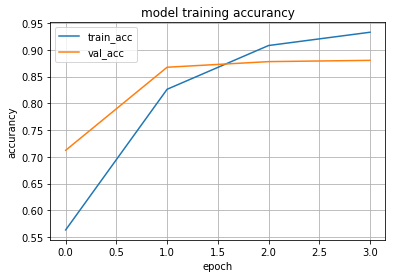

In [8]:
plt.plot(Model.history['acc'])
plt.plot(Model.history['val_acc'])
plt.title('model training accurancy')
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.legend(['train_acc','val_acc'],loc='best')
plt.grid()
plt.show()